# Here is a simpler process

In [1]:
from platform import python_version
import autokeras as ak
import datetime as dt
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import f1_score
print(python_version())
import scipy
print('scipy:'+scipy.__version__)
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import log_loss
import time

3.7.4
scipy:1.7.3


In [2]:
import os

os.getcwd()

'C:\\Users\\shaun'

# Read the file

In [3]:
datapath = r"C:\Users\shaun\OneDrive\Desktop\Feature_Engineering_Project\credit-g.csv"
#datapath = './'
#filename = 'ionosphere.csv'
df = pd.read_csv(datapath)
print(df.shape)
df.head()

(1000, 21)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,Target
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [4]:
target = 'Target'

In [5]:
#Extract list of numeric columns
cols = df.select_dtypes([np.number]).columns
cols = list(cols)
#cols.remove('Target')

<AxesSubplot:>

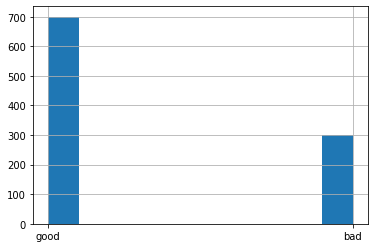

In [6]:
df[target].hist()

In [7]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df[target] = lb_make.fit_transform(df[target])
df[[target]].head(1)

,Target
0,1


# Import each tool you are evaluating here

Importing PyImpetus, Eli5, EvolutionaryFS, autofeat ; To Include More from https://www.opensourceagenda.com/tags/feature-selection?page=2

In [8]:
from PyImpetus import PPIMBC
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from EvolutionaryFS import GeneticAlgorithmFS
from zoofs import ParticleSwarmOptimization

import featurewiz as fwiz
from featurewiz import FeatureWiz

from autofeat import FeatureSelector

#from autofeat import AutoFeatRegressor

Imported DASK version = 0.0.90. nrows=None uses all rows. Set nrows=1000 to randomly sample fewer rows.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


# Define the dataset and target here

In [9]:
preds = [x for x in list(df) if x not in [target]]
len(preds)

20

In [10]:
X = df[preds]
y = df[target]
print(X.shape, y.shape)

(1000, 20) (1000,)


In [11]:
##get train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1,
                                                    stratify=y)
print(X_train.shape, X_test.shape)

(800, 20) (200, 20)


In [12]:
X_train

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
561,<0,24,all paid,radio/tv,1546,<100,4<=X<7,4,male single,guarantor,4,car,24,bank,rent,1,unskilled resident,1,none,yes
613,<0,24,all paid,used car,3632,<100,1<=X<4,1,female div/dep/mar,guarantor,4,car,22,bank,rent,1,skilled,1,none,no
352,no checking,18,critical/other existing credit,used car,3229,no known savings,unemployed,2,male single,none,4,no known property,38,none,own,1,high qualif/self emp/mgmt,1,yes,yes
568,0<=X<200,48,existing paid,radio/tv,3979,no known savings,4<=X<7,4,male single,none,1,car,41,none,own,2,skilled,2,yes,yes
295,0<=X<200,48,existing paid,furniture/equipment,9960,<100,<1,1,female div/dep/mar,none,2,car,26,none,own,1,skilled,1,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,<0,36,critical/other existing credit,furniture/equipment,6229,<100,<1,4,female div/dep/mar,co applicant,4,no known property,23,none,rent,2,unskilled resident,1,yes,yes
397,<0,36,critical/other existing credit,furniture/equipment,2348,<100,1<=X<4,3,male mar/wid,none,2,life insurance,46,none,own,2,skilled,1,yes,yes
227,<0,12,existing paid,furniture/equipment,7865,<100,>=7,4,male single,none,4,no known property,53,none,for free,1,high qualif/self emp/mgmt,1,yes,yes
128,0<=X<200,12,critical/other existing credit,used car,1860,<100,unemployed,4,male single,none,2,car,34,none,own,2,high qualif/self emp/mgmt,1,yes,yes


In [13]:
#Find categorical columns and object columns to transform into numeric: 
cat_columns = list(X.select_dtypes(['category']).columns)
obj_columns = list(X.select_dtypes(['object']).columns)
len(cat_columns), len(obj_columns)

(0, 13)

In [14]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns)+len(obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X_train[each_cat] = LB.fit_transform(X_train[each_cat])
        X_test[each_cat] = LB.transform(X_test[each_cat])
        print(each_cat+' completed transform')

checking_status completed transform
credit_history completed transform
purpose completed transform
savings_status completed transform
employment completed transform
personal_status completed transform
other_parties completed transform
property_magnitude completed transform
other_payment_plans completed transform
housing completed transform
job completed transform
own_telephone completed transform
foreign_worker completed transform


In [15]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X_train[each_col] = scaler.fit_transform(X_train[each_col].values.reshape(-1,1))
    X_test[each_col] = scaler.transform(X_test[each_col].values.reshape(-1,1))
print('completed Min Max Scaling')

completed Min Max Scaling


In [16]:
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
561,1,30.117647,0,6,8.059756,2,1,100.0,3,1,100.0,0,9.839286,0,2,1.0,3,1.0,0,1
613,1,30.117647,0,9,19.422912,2,0,1.0,0,1,100.0,0,6.303571,0,2,1.0,1,1.0,0,0
352,3,21.382353,1,9,17.227633,4,4,34.0,3,2,100.0,2,34.589286,1,1,1.0,0,1.0,1,1
568,0,65.058824,3,6,21.313140,4,1,100.0,3,2,1.0,0,39.892857,1,1,34.0,1,100.0,1,1
295,0,65.058824,3,3,53.893694,2,2,1.0,0,2,34.0,0,13.375000,1,1,1.0,1,1.0,1,1


### Since The Tool is not allowed to look at test data, you must only use X_train and y_train for the Tool

In [17]:
train = pd.concat([X_train,y_train],axis=1)
print(train.shape)

(800, 21)


In [18]:
test = pd.concat([X_test,y_test],axis=1)
print(test.shape)

(200, 21)


In [19]:
time_to_fit = pd.DataFrame(columns=['Feature_Engineering_Technique','Start_Time','End_Time','Time_to_fit'])
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit


############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (800, 21)
    Caution: We will try to reduce the memory usage of dataframe from 0.09 MB
    Memory usage after optimization is: 0.03 MB
        decreased by 70.0%
     Loaded. Shape = (800, 21)
No test data filename given...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    20 Predictors classified...
        No variables removed since no ID or low-information var

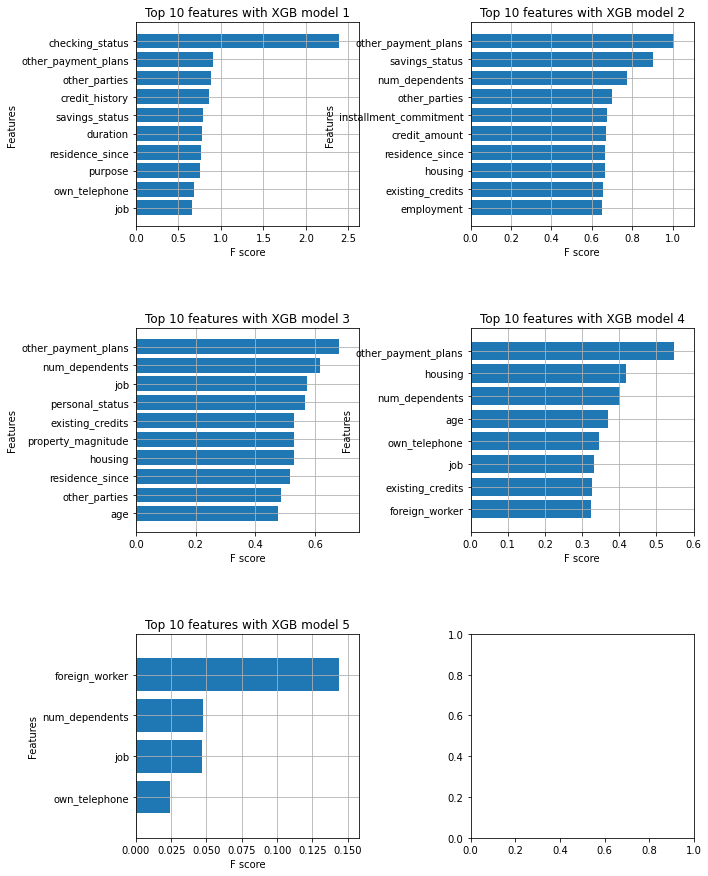

            Total time taken for XGBoost feature selection = 1 seconds
    ID variables are always selected so that rows can be identified. But they are not important!
Selected 20 important features:
['checking_status', 'other_payment_plans', 'other_parties', 'credit_history', 'savings_status', 'duration', 'residence_since', 'purpose', 'own_telephone', 'job', 'num_dependents', 'installment_commitment', 'credit_amount', 'housing', 'existing_credits', 'employment', 'personal_status', 'property_magnitude', 'age', 'foreign_worker']
    Time taken = 1 seconds
Returning list of 20 important features and dataframe.
    Time taken to create entire pipeline = 1 second(s)


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146


In [20]:
###################################################FeatureWiz#############################################################
### Now run it through featurewiz - remember featurewiz does not look at test data only modifies for numeric
start_featurewiz = time.time()

features = FeatureWiz(corr_limit=0.70, verbose=2, sep=',', header=0, feature_engg='', category_encoders='',dask_xgboost_flag=False, nrows=None)
X_train_selected = features.fit_transform(X_train,y_train)
end_featurewiz = time.time()
diff = end_featurewiz - start_featurewiz
best_columns_featurewiz = features.features
len(best_columns_featurewiz)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureWiz','Start_Time':start_featurewiz,'End_Time':end_featurewiz,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

In [21]:
#################Autofeat#########################

start_autofeat = time.time()
fsel = FeatureSelector(verbose=1)
new_X = fsel.fit_transform(X_train, y_train)
end_autofeat = time.time()
diff = end_autofeat - start_autofeat
best_columns_autofeat = list(new_X.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Autofeat','Start_Time':start_autofeat,'End_Time':end_autofeat,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 10 features after 5 feature selection runs
[featsel] 10 features after correlation filtering
[featsel] 10 features after noise filtering


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146
1,Autofeat,1.643556e+09,1.643556e+09,0.705162


In [22]:
##############FeatureEngine############
from sklearn.pipeline import Pipeline
from feature_engine.selection import (
    DropDuplicateFeatures,
    DropConstantFeatures,
    DropDuplicateFeatures,
    DropCorrelatedFeatures,
    SmartCorrelatedSelection,
    SelectByShuffling,
    SelectBySingleFeaturePerformance,
    RecursiveFeatureElimination,
)

pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)), # drops constand and quasi-constant altogether
    ('duplicated', DropDuplicateFeatures()), # drops duplicates
    ('correlation', SmartCorrelatedSelection( # drops correlated
        threshold=0.8,
        selection_method="model_performance",
        estimator=RandomForestClassifier(n_estimators=10, random_state=1),
    )),
])

# find features to remove

start_fe = time.time()
pipe.fit(X_train, y_train)
end_fe = time.time()

diff = end_fe - start_fe

print('Number of original variables: ', X_train.shape[1])

X_train_fe = pipe.transform(X_train)

print('Number of variables after selection: ', X_train_fe.shape[1])

best_columns_fe = list(X_train_fe.columns)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'FeatureEngine','Start_Time':start_fe,'End_Time':end_fe,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

Number of original variables:  20
Number of variables after selection:  20


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146
1,Autofeat,1.643556e+09,1.643556e+09,0.705162
2,FeatureEngine,1.643556e+09,1.643556e+09,0.021985


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    5.5s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_

Feature importance:  [13.862943611198906, 13.862943611198906, 11.560358518204861, 6.019879594506852, 6.019879594506852, 5.881552029618836, 4.872252901282677, 4.533576532801082, 3.1044876919713547]


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


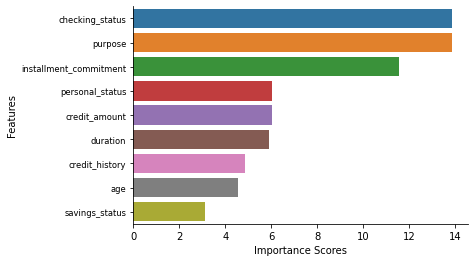

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146
1,Autofeat,1.643556e+09,1.643556e+09,0.705162
2,FeatureEngine,1.643556e+09,1.643556e+09,0.021985
3,PyImpetus,1.643556e+09,1.643556e+09,8.178902


In [23]:
####################################################PyImpetus#####################################################
start_pyimpetus = time.time()
model = PPIMBC(LogisticRegression(random_state=27, max_iter=1000, class_weight="balanced"), cv=0, num_simul=20, simul_type=0, simul_size=0.2, sig_test_type="non-parametric", random_state=27, verbose=2, p_val_thresh=0.05)
# Fit this above object on the train part and transform the train dataset into selected feature subset
# NOTE: x_train has to be a dataframe and y_train has to be a numpy array
x_train = model.fit_transform(X_train, y_train.values)
# Transform the test set as well
# Check out the scores of each feature. The scores are in order of the selected feature list
# NOTE: You can use these scores ina feature selection ensemble
print("Feature importance: ", model.feat_imp_scores)
# Plot the feature importance scores
model.feature_importance()
best_columns_pyimpetus = list(x_train.columns)
end_pyimpetus = time.time()
diff = end_pyimpetus - start_pyimpetus
len(x_train.columns)
# Convert the data into numpy arrays
#x_train, x_test = x_train.values, x_test.values
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'PyImpetus','Start_Time':start_pyimpetus,'End_Time':end_pyimpetus,'Time_to_fit':diff} , ignore_index=True)
time_to_fit.head()

#######################################################Eli5##############################################################

sel = SelectFromModel(
    PermutationImportance(SVC(), cv=5),
    threshold=0.05,
).fit(X_train, y_train)
x_train = sel.transform(X_train)
best_columns_eli5 = x_train.columns

TypeError: check_cv() takes from 0 to 2 positional arguments but 3 were given

Time To Generate Features 

In [24]:
time_to_fit.head()

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146
1,Autofeat,1.643556e+09,1.643556e+09,0.705162
2,FeatureEngine,1.643556e+09,1.643556e+09,0.021985
3,PyImpetus,1.643556e+09,1.643556e+09,8.178902


In [25]:
#############################################EvolutionaryFS#############################################
##get train and test data
data_dict={0:{'x_train':X_train,'y_train':y_train,'x_test':X_test,'y_test':y_test}}
columns_list=list(X.columns)

start_evolutionaryfs = time.time()
model_object=LogisticRegression(n_jobs=-1,random_state=1)
evoObj=GeneticAlgorithmFS(model=model_object,data_dict=data_dict,cost_function=f1_score,average='micro',cost_function_improvement='increase',columns_list=columns_list,generations=20,population=30,prob_crossover=0.9,prob_mutation=0.1,run_time=60000)
best_columns_EvolutionaryFS=evoObj.GetBestFeatures()
end_evolutionaryfs = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs
len(best_columns_EvolutionaryFS)
time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'EvolutionaryFS','Start_Time':start_evolutionaryfs,'End_Time':end_evolutionaryfs,'Time_to_fit': diff} , ignore_index=True)
time_to_fit.head()

================= Best performance for generation 0 : 0.765 =================
================= Best performance for generation 1 : 0.765 =================
================= Best performance for generation 2 : 0.765 =================
================= Best performance for generation 3 : 0.775 =================
================= Best performance for generation 4 : 0.7699999999999999 =================
================= Best performance for generation 5 : 0.78 =================
================= Best performance for generation 6 : 0.78 =================
================= Best performance for generation 7 : 0.78 =================
================= Best performance for generation 8 : 0.785 =================
================= Best performance for generation 9 : 0.785 =================
================= Best performance for generation 10 : 0.78 =================
================= Best performance for generation 11 : 0.785 =================
================= Best performance for generation 12 

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146
1,Autofeat,1.643556e+09,1.643556e+09,0.705162
2,FeatureEngine,1.643556e+09,1.643556e+09,0.021985
3,PyImpetus,1.643556e+09,1.643556e+09,8.178902
4,EvolutionaryFS,1.643556e+09,1.643556e+09,54.624171


In [26]:
#########################################################Zoof##############################################
# define your own objective function, make sure the function receives four parameters,
#  fit your model and return the objective value ! 
def objective_function_topass(model,X_train, y_train, X_test, y_test):      
    model.fit(X_train,y_train)  
    P=log_loss(y_test,model.predict_proba(X_test))
    return P
    
# create object of algorithm
algo_object=ParticleSwarmOptimization(objective_function_topass,n_iteration=25,
                                       population_size=20,minimize=True)
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()                                       
# fit the algorithm
start_zoof = time.time()

best_columns_zoof = algo_object.fit(lgb_model,X_train, y_train, X_train, y_train,verbose=True)

end_zoof = time.time()
diff = end_evolutionaryfs - start_evolutionaryfs

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Zoof','Start_Time':start_zoof,'End_Time':end_zoof,'Time_to_fit': diff} , ignore_index=True)

		 Best value of metric across iteration 	 Best value of metric across population  
Iteration 0 	 0.0900209747946552 					 0.0900209747946552 
Iteration 1 	 0.09490547383739853 					 0.0900209747946552 
Iteration 2 	 0.09404510527366906 					 0.0900209747946552 
Iteration 3 	 0.09110753450199686 					 0.0900209747946552 
Iteration 4 	 0.08141486062149682 					 0.08141486062149682 
Iteration 5 	 0.08265885479975671 					 0.08141486062149682 
Iteration 6 	 0.07634345680073558 					 0.07634345680073558 
Iteration 7 	 0.07931094931499905 					 0.07634345680073558 
Iteration 8 	 0.07403978426982903 					 0.07403978426982903 
Iteration 9 	 0.0732002970078416 					 0.0732002970078416 
Iteration 10 	 0.07269664473866447 					 0.07269664473866447 
Iteration 11 	 0.07015897528670804 					 0.07015897528670804 
Iteration 12 	 0.07412904001569814 					 0.07015897528670804 
Iteration 13 	 0.06988717747834094 					 0.06988717747834094 
Iteration 14 	 0.07306566820367061 					 0.06988717747834094 
Ite

In [27]:
###############################Sklearn Genetic Opt##########################################################

import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np

clf = SVC(gamma='auto')

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    scoring="balanced_accuracy",
    population_size=30,
    generations=20,
    n_jobs=-1)

start_gopt = time.time()
# Train and select the features
evolved_estimator.fit(X_train, y_train)
end_gopt = time.time()

diff = end_gopt-start_gopt

# Features selected by the algorithm
best_columns_genetic_opt = list(evolved_estimator.best_features_)
best_columns_genetic_opt = X_train.columns[best_columns_genetic_opt]

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'Genetic OPT','Start_Time':start_gopt,'End_Time':end_gopt,'Time_to_fit': diff} , ignore_index=True)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	30    	0.513187	0.0136141  	0.549117   	0.494344   
1  	60    	0.529702	0.0155832  	0.551171   	0.494344   
2  	60    	0.544004	0.0083812  	0.559204   	0.517556   
3  	60    	0.548594	0.00646021 	0.559204   	0.527397   
4  	60    	0.552512	0.00487828 	0.561591   	0.549117   
5  	60    	0.556702	0.00488845 	0.562218   	0.549117   
6  	60    	0.559739	0.00280473 	0.565159   	0.554174   
7  	60    	0.562649	0.00246346 	0.570812   	0.559204   
8  	60    	0.563778	0.00274527 	0.570812   	0.560688   
9  	60    	0.565296	0.00526644 	0.589572   	0.562218   
10 	60    	0.568883	0.00557246 	0.589572   	0.562218   
11 	60    	0.575911	0.00852649 	0.589572   	0.562476   
12 	60    	0.581504	0.00580084 	0.589572   	0.570812   
13 	60    	0.584881	0.00424277 	0.589572   	0.574979   
14 	60    	0.588631	0.00286233 	0.594918   	0.579455   
15 	60    	0.589602	0.00134623 	0.594918   	0.584509   
16 	60    	0.590157	0.00159079 	0.594918   	0.58

In [28]:
#accxac

In [29]:
##################BorutaPy###################
from boruta import BorutaPy

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

start_bpy = time.time()
feat_selector.fit(X_train.values, y_train)
end_bpy = time.time()

diff = end_bpy-start_bpy

# check selected features - first 5 features are selected
feat_selector.support_

# check ranking of features
feat_selector.ranking_

best_columns_borutapy = list(X_train.loc[:,feat_selector.support_].columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaPy','Start_Time':start_bpy,'End_Time':end_bpy,'Time_to_fit': diff} , ignore_index=True)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	20
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
Iteration: 	16 / 100
Confirmed: 	4
Tentative: 	3
Rejected: 	13
I

In [30]:
#################BorutaShap##################

from BorutaShap import BorutaShap

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

start_bshap = time.time()
Feature_Selector.fit(X=X_train, y=y_train, n_trials=100, sample=False,train_or_test = 'test', normalize=True,verbose=True)
end_bshap = time.time()

diff = end_bshap-start_bshap

# check selected features - first 5 features are selected
subset = Feature_Selector.Subset()

best_columns_borutashap = list(subset.columns)

time_to_fit = time_to_fit.append({'Feature_Engineering_Technique':'BorutaShap','Start_Time':start_bshap,'End_Time':end_bshap,'Time_to_fit': diff} , ignore_index=True)

  0%|          | 0/100 [00:00<?, ?it/s]

4 attributes confirmed important: ['credit_amount', 'purpose', 'duration', 'checking_status']
16 attributes confirmed unimportant: ['installment_commitment', 'property_magnitude', 'personal_status', 'savings_status', 'housing', 'job', 'other_payment_plans', 'other_parties', 'credit_history', 'num_dependents', 'residence_since', 'own_telephone', 'existing_credits', 'age', 'employment', 'foreign_worker']
0 tentative attributes remains: []


In [31]:
#Create a dictionary of lists with feature engineering technique
fs = {"FeatureWiz":best_columns_featurewiz,"Autofeat":best_columns_autofeat,"FeatureEngine":best_columns_fe,"PyImpetus":best_columns_pyimpetus,"EvolutionaryFS":best_columns_EvolutionaryFS,"Zoof":best_columns_zoof, "Genetic OPT":best_columns_genetic_opt, "BorutaPy":best_columns_borutapy, "BorutaShap":best_columns_borutashap}
#fs

In [32]:
fs

{'FeatureWiz': ['checking_status',
  'other_payment_plans',
  'other_parties',
  'credit_history',
  'savings_status',
  'duration',
  'residence_since',
  'purpose',
  'own_telephone',
  'job',
  'num_dependents',
  'installment_commitment',
  'credit_amount',
  'housing',
  'existing_credits',
  'employment',
  'personal_status',
  'property_magnitude',
  'age',
  'foreign_worker'],
 'Autofeat': ['purpose',
  'duration',
  'checking_status',
  'installment_commitment',
  'credit_amount',
  'personal_status',
  'credit_history',
  'savings_status',
  'age',
  'own_telephone'],
 'FeatureEngine': ['checking_status',
  'duration',
  'credit_history',
  'purpose',
  'credit_amount',
  'savings_status',
  'employment',
  'installment_commitment',
  'personal_status',
  'other_parties',
  'residence_since',
  'property_magnitude',
  'age',
  'other_payment_plans',
  'housing',
  'existing_credits',
  'job',
  'num_dependents',
  'own_telephone',
  'foreign_worker'],
 'PyImpetus': ['checking

# Here is an even simpler way to do multi fold cross validation
## First set a baseline performance by including all features in model
## Then compare that model to feature selection by EvolutionaryFS

## The baseline model with all features yields a balanced accuracy score of 91.88%

In [33]:
## You must set the randomstate for cross validation. Otherwise, scores will be totally random each time.
from sklearn.model_selection import StratifiedKFold, KFold
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
#cv = KFold(n_splits=5,shuffle=False, random_state=99) ## Use this for Regression

# We have to do the same transforms for X and y 

In [34]:
#Category+Object Transforms -> You must always fit_transform train while only doing transform for test
if len(cat_columns+obj_columns):
    for each_cat in cat_columns+obj_columns:
        LB = LabelEncoder()
        X[each_cat] = LB.fit_transform(X[each_cat])
        print(each_cat+' completed X transform')
X.head()

checking_status completed X transform
credit_history completed X transform
purpose completed X transform
savings_status completed X transform
employment completed X transform
personal_status completed X transform
other_parties completed X transform
property_magnitude completed X transform
other_payment_plans completed X transform
housing completed X transform
job completed X transform
own_telephone completed X transform
foreign_worker completed X transform


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,1,6,1,6,1169,4,3,4,3,2,4,3,67,1,1,2,1,1,1,1
1,0,48,3,6,5951,2,0,2,0,2,2,3,22,1,1,1,1,1,0,1
2,3,12,1,2,2096,2,1,2,3,2,3,3,49,1,1,1,3,2,0,1
3,1,42,3,3,7882,2,1,2,3,1,4,1,45,1,0,1,1,2,0,1
4,1,24,2,4,4870,2,0,3,3,2,4,2,53,1,0,2,1,2,0,1


In [35]:
#MinMax Scale Features -> You must always fit_transform train while only doing transform for test
for each_col in cols:
    scaler = MinMaxScaler(feature_range = (1,100))
    X[each_col] = scaler.fit_transform(X[each_col].values.reshape(-1,1))
print('completed Min Max Scaling for X')

completed Min Max Scaling for X


# Using all features in dataset, this is the baseline score

In [36]:
model1 = RandomForestClassifier(n_estimators=300, random_state=99)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=model1, X=X, y=y, scoring='balanced_accuracy', cv=cv)
print(scores)
print('Mean Score for all features = %s' %scores.mean())

[0.62261905 0.59880952 0.69047619 0.65833333 0.68690476]
Mean Score for all features = 0.6514285714285715


##  Here we run Cross Validation and get accuracy metrics for each technique

In [37]:
performance = pd.DataFrame(columns=['Start_Time','End_Time','Run_Time','Accuracy_Score','Model','Feature_Engineering_Technique'])
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=99)
for key,value in fs.items():
    start = time.time()
    model2 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(estimator=model2, X=X_train[value], y=y_train, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    end = time.time()
    diff = (end-start)
    print(scores)
    print('Mean Score for %s = %s' %(key, scores.mean()))
    performance = performance.append({'Start_Time':start,'End_Time':end,'Run_Time':diff,'Accuracy_Score':scores.mean(),'Model':'RandomForest','Feature_Engineering_Technique':key} , ignore_index=True)
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_CV_Accuracy'] = scores.mean()
time_to_fit

[0.63690476 0.66517857 0.64136905 0.64732143 0.64285714]
Mean Score for FeatureWiz = 0.6467261904761904
[0.62202381 0.63392857 0.68452381 0.67559524 0.61160714]
Mean Score for Autofeat = 0.6455357142857143
[0.625      0.6547619  0.61607143 0.64732143 0.65922619]
Mean Score for FeatureEngine = 0.6404761904761905
[0.64732143 0.64285714 0.69940476 0.6547619  0.61755952]
Mean Score for PyImpetus = 0.6523809523809524
[0.61309524 0.68303571 0.6889881  0.66964286 0.65922619]
Mean Score for EvolutionaryFS = 0.6627976190476191
[0.625      0.6547619  0.61607143 0.64732143 0.65922619]
Mean Score for Zoof = 0.6404761904761905
[0.59672619 0.68303571 0.67261905 0.67559524 0.63244048]
Mean Score for Genetic OPT = 0.6520833333333333
[0.61309524 0.64285714 0.62797619 0.61011905 0.61458333]
Mean Score for BorutaPy = 0.6217261904761905
[0.63541667 0.62797619 0.61160714 0.61607143 0.625     ]
Mean Score for BorutaShap = 0.6232142857142857


,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146,0.646726
1,Autofeat,1.643556e+09,1.643556e+09,0.705162,0.645536
2,FeatureEngine,1.643556e+09,1.643556e+09,0.021985,0.640476
3,PyImpetus,1.643556e+09,1.643556e+09,8.178902,0.652381
4,EvolutionaryFS,1.643556e+09,1.643556e+09,54.624171,0.662798
5,Zoof,1.643556e+09,1.643556e+09,54.624171,0.640476
6,Genetic OPT,1.643556e+09,1.643556e+09,117.565464,0.652083
7,BorutaPy,1.643556e+09,1.643556e+09,26.174901,0.621726
8,BorutaShap,1.643556e+09,1.643556e+09,171.565031,0.623214


In [38]:
time_to_fit

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146,0.646726
1,Autofeat,1.643556e+09,1.643556e+09,0.705162,0.645536
2,FeatureEngine,1.643556e+09,1.643556e+09,0.021985,0.640476
3,PyImpetus,1.643556e+09,1.643556e+09,8.178902,0.652381
4,EvolutionaryFS,1.643556e+09,1.643556e+09,54.624171,0.662798
5,Zoof,1.643556e+09,1.643556e+09,54.624171,0.640476
6,Genetic OPT,1.643556e+09,1.643556e+09,117.565464,0.652083
7,BorutaPy,1.643556e+09,1.643556e+09,26.174901,0.621726
8,BorutaShap,1.643556e+09,1.643556e+09,171.565031,0.623214


## You must finally train a model on X_train and test it on X_test using selected features

In [39]:
#Using Lime to interpret the results of model
#from lime import lime_text
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score, mean_squared_error
#import lime.lime_tabular

for key,value in fs.items():
    model3 = RandomForestClassifier(n_estimators=300, random_state=99)
    from sklearn.metrics import classification_report
    model3.fit(X_train[value], y_train)
    print(classification_report(y_test, model3.predict(X_test[value])))
    score_val = balanced_accuracy_score(y_test, model3.predict(X_test[value]))
    time_to_fit.loc[(time_to_fit['Feature_Engineering_Technique']==key), 'Mean_Test_Accuracy'] = score_val
    #print("Lime Feature Importance : "+key)
    #explainer = lime.lime_tabular.LimeTabularExplainer(X_train[value].values, feature_names=X_train[value].columns, class_names=[0, 1], mode='classification')
    #exp = explainer.explain_instance(X_test[value].values[1], model3.predict_proba, num_features=len(X_train[value].columns))
    #exp.show_in_notebook(show_table=True, show_all=False)

              precision    recall  f1-score   support

           0       0.71      0.40      0.51        60
           1       0.78      0.93      0.85       140

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200

              precision    recall  f1-score   support

           0       0.66      0.45      0.53        60
           1       0.79      0.90      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.68      0.69       200
weighted avg       0.75      0.77      0.75       200

              precision    recall  f1-score   support

           0       0.69      0.37      0.48        60
           1       0.77      0.93      0.84       140

    accuracy                           0.76       200
   macro avg       0.73      0.65      0.66       200
weighted avg       0.75      0.76      0.73       200

              preci

In [40]:
time_to_fit['Dataset'] = "Credit G"
time_to_fit['Type'] = "Multi Classification"
time_to_fit['Metric'] = "balanced accuracy"

In [41]:
time_to_fit

,Feature_Engineering_Technique,Start_Time,End_Time,Time_to_fit,Mean_CV_Accuracy,Mean_Test_Accuracy,Dataset,Type,Metric
0,FeatureWiz,1.643556e+09,1.643556e+09,1.324146,0.646726,0.664286,Credit G,Multi Classification,balanced accuracy
1,Autofeat,1.643556e+09,1.643556e+09,0.705162,0.645536,0.675000,Credit G,Multi Classification,balanced accuracy
2,FeatureEngine,1.643556e+09,1.643556e+09,0.021985,0.640476,0.647619,Credit G,Multi Classification,balanced accuracy
3,PyImpetus,1.643556e+09,1.643556e+09,8.178902,0.652381,0.672619,Credit G,Multi Classification,balanced accuracy
4,EvolutionaryFS,1.643556e+09,1.643556e+09,54.624171,0.662798,0.675000,Credit G,Multi Classification,balanced accuracy
5,Zoof,1.643556e+09,1.643556e+09,54.624171,0.640476,0.647619,Credit G,Multi Classification,balanced accuracy
6,Genetic OPT,1.643556e+09,1.643556e+09,117.565464,0.652083,0.584524,Credit G,Multi Classification,balanced accuracy
7,BorutaPy,1.643556e+09,1.643556e+09,26.174901,0.621726,0.597619,Credit G,Multi Classification,balanced accuracy
8,BorutaShap,1.643556e+09,1.643556e+09,171.565031,0.623214,0.585714,Credit G,Multi Classification,balanced accuracy


# This is another way to know how well feature selection works

notes : Class imbalance - PyImpetus